In [2]:
#import required libraries

import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#read data and understand the content
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [4]:
#read pluto data and understand the column

bsize = gp.GeoDataFrame.from_file("mn_mappluto_15v1\Manhattan\MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x28188FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0F79B750>]], dtype=object)

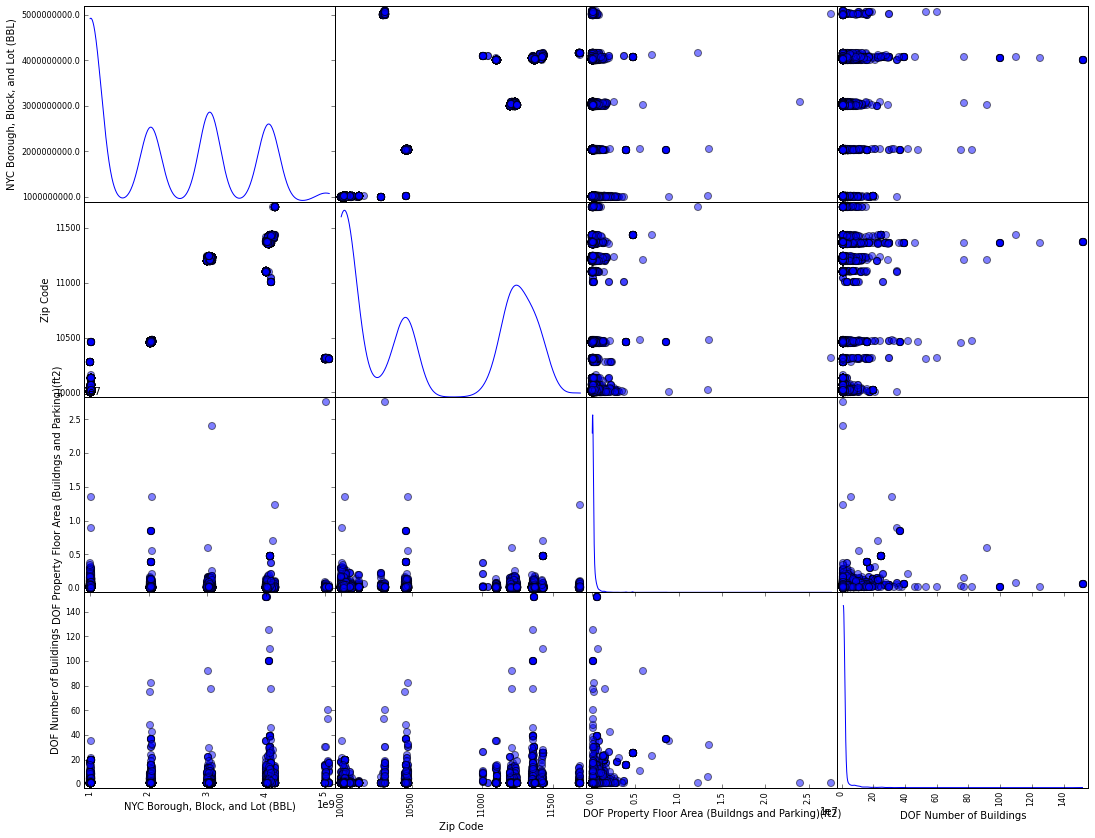

In [5]:
#plot scatter matrix 

from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=200, figsize=(18, 14), diagonal='kde')

In [6]:
#convert to float arrays
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [7]:
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [8]:
# create indexx for reported DOF Property Floor area
indx0 = np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)'])
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx0]=float('NaN')

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
#create index for site EUI
indx1 = np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)'])
nrg['Site EUI(kBtu/ft2)'][~indx1]=float('NaN')

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
#create index for BBL
indx2 = np.vectorize(canconvert)(bsize['BBL'])
bsize['BBL'][~indx2]=float('NaN')

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [11]:
#check conversion
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)[:20]
print nrg['Site EUI(kBtu/ft2)'].astype(float)[:20]


print bsize.BBL.astype(float)[:20]


Record Number
16099     91968
500      235370
5017      64806
5116      62839
363       98000
6876      53275
10714     61846
1214     204417
1544      60110
1905     457946
2301     511001
15059     56442
674       60939
2537      78435
2841      80293
2945     104990
15120    528180
3053     440895
4233      69656
4777      62300
Name: Reported Property Floor Area (Building(s)) (ft²), dtype: float64
Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
Name: Site EUI(kBtu/ft2), dtype: float64
0     1002760020
1     1002280022
2     1005900056
3     1005890030
4     1005310056
5     1011860040
6     1004940026
7     1005580017
8     1001807505
9     1005820050
10    1004680049
11    1008090

#Merge Part

In [12]:
#merge 

nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']
bblnrgdata = pd.merge(nrg, bsize, on='BBL')
bblnrgdata[:5]

C:\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
C:\Anaconda\lib\site-packages\pandas\core\index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough_x,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,1005050001,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013,Filed,82.1,...,0,1926,None,10013,M1-6,None,None,None,12a,"POLYGON ((982849.6037999988 203886.2427999973,..."
1,1021420100,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032,Filed,137.69999999999999,...,0,1924,None,10032,R8,None,None,None,3b,"POLYGON ((1001098.760600001 246912.0266000032,..."
2,1021750080,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040,Filed,103.2,...,0,1920,None,10040,R7-2,None,None,None,3a,"POLYGON ((1004289.818000004 253753.9872000068,..."
3,1003360005,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002,Filed,74,...,0,1982,Y,10002,R8,None,None,None,12c,"POLYGON ((988978.3273999989 200091.3113999963,..."
4,1008070028,NaN,1-00807-0028,1015181,119,WEST 31 STREET,Manhattan,10001,Filed,130,...,0,1912,None,10001,C6-4.5,None,None,None,8d,"POLYGON ((987142.3643999994 212082.1648000032,..."


In [13]:
#create total EUI by multiply site and floor area
bblnrgdata['EUIt'] = bblnrgdata['Site EUI(kBtu/ft2)'].astype(float)*bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print bblnrgdata['EUIt'][:5]

0    19323877.0
1     8923786.2
2     6484984.8
3     7252000.0
4    26574210.0
Name: EUIt, dtype: float64


C:\Anaconda\lib\site-packages\pandas\core\index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


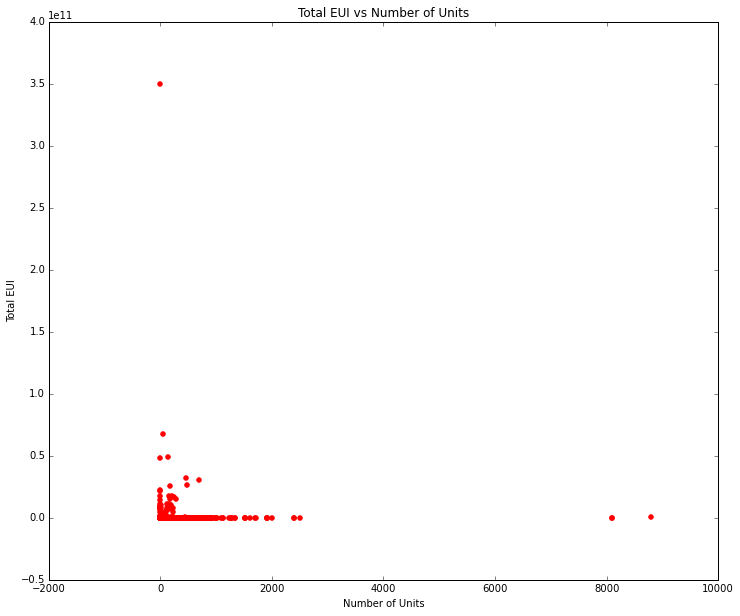

In [14]:
#plot total EUI over units
pl.figure(figsize=(12,10))
pl.scatter(bblnrgdata['UnitsTotal'],bblnrgdata['EUIt'], color='r')
pl.title('Total EUI vs Number of Units')
pl.xlabel('Number of Units')
pl.ylabel('Total EUI')

In [15]:
#cleaning data
#bblnrgdata_cut = bblnrgdata[(bblnrgdata.EUIt>1000) & (bblnrgdata.EUIt<1e10)]
#bblnrgdata_cut = bblnrgdata[(bblnrgdata.UnitsTotal<1000) & (bblnrgdata.UnitsTotal>1)]

bblnrgdata_cut = bblnrgdata[(bblnrgdata.EUIt>1000) & (bblnrgdata.EUIt<1e10) & (bblnrgdata.UnitsTotal<1000) & (bblnrgdata.UnitsTotal>1)]

(0, 10000000000.0)

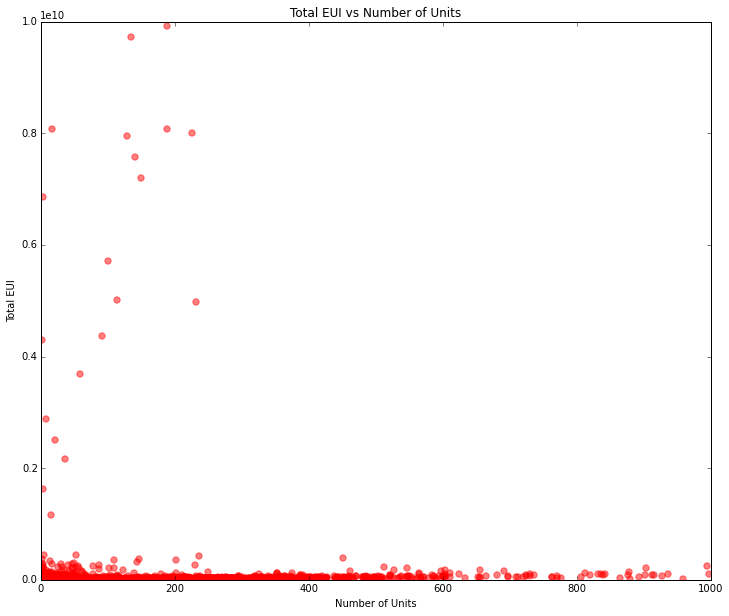

In [16]:
#plot clean data
pl.figure(figsize=(12,10))
pl.scatter(bblnrgdata_cut['UnitsTotal'],bblnrgdata_cut['EUIt'], alpha=.5, s=40, color='r')
pl.title('Total EUI vs Number of Units')
pl.xlabel('Number of Units')
pl.ylabel('Total EUI')
pl.xlim([0,1000])
pl.ylim([0,1e10])

In [17]:
# Creating log
UnitsLog = np.log10(bblnrgdata_cut['UnitsTotal'])
EUILog = np.log10(bblnrgdata_cut['EUIt'])

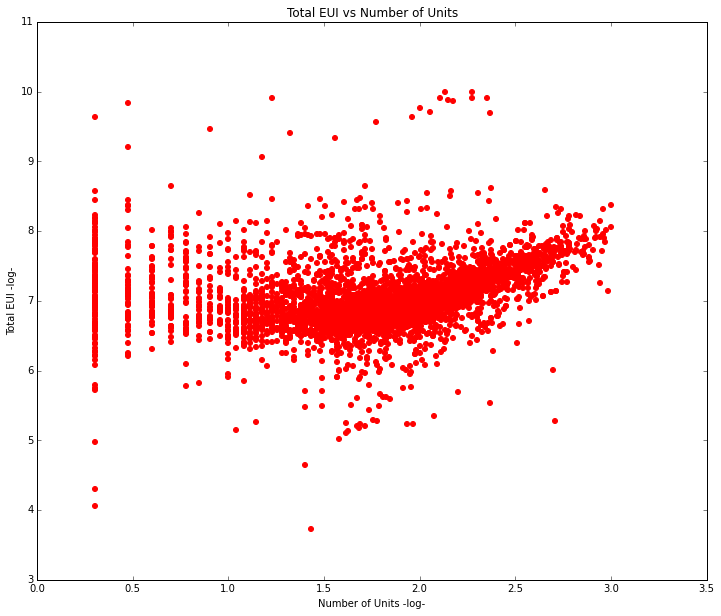

In [18]:
#plotting the logs
pl.figure(figsize=(12,10))
pl.scatter(UnitsLog, EUILog, s=25, color='r')
pl.title('Total EUI vs Number of Units')
pl.xlabel('Number of Units -log-')
pl.ylabel('Total EUI -log-')

In [19]:

import statsmodels.api as sm

x = np.log10(bblnrgdata_cut.UnitsTotal)
y = np.log10(bblnrgdata_cut.EUIt)

#print x and y

X = sm.add_constant(x)

#print X

model = sm.OLS(y, X, missing='drop')#.fit() # ignores entires where x or y is NaN
fit = model.fit()
fit.params[1], fit.params[0] # could also return stderr in each via fit.bse

(0.20624600657503483, 6.6599805405097356)

                            OLS Regression Results                            
Dep. Variable:                   EUIt   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     273.1
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           1.24e-59
Time:                        23:11:50   Log-Likelihood:                -2827.3
No. Observations:                4609   AIC:                             5659.
Df Residuals:                    4607   BIC:                             5671.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.6600      0.023    287.564      0.0

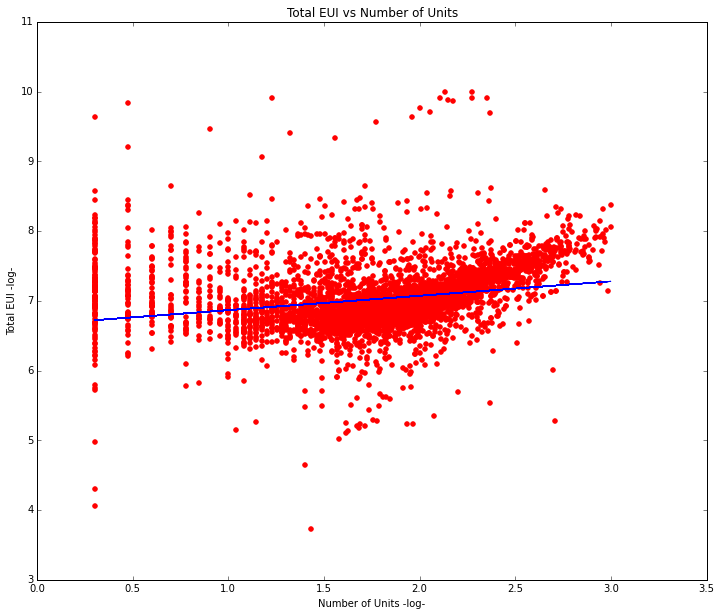

In [20]:
#fitting and plotting

print fit.summary()

pl.figure(figsize=(12,10))
pl.scatter(x, y, color='r')
pl.plot(x, fit.predict(), color = 'b')
pl.title('Total EUI vs Number of Units')
pl.xlabel('Number of Units -log-')
pl.ylabel('Total EUI -log-')

In [21]:
#units and energy fitting and plotting

x1 = np.log10(bblnrgdata_cut.EUIt)
y1 = np.log10(bblnrgdata_cut.UnitsTotal)
X = sm.add_constant(x1)

model = sm.OLS(y1, X, missing='drop')
fit = model.fit()
fit.params[1], fit.params[0]

print fit.summary()

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     273.1
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           1.24e-59
Time:                        23:11:50   Log-Likelihood:                -3459.0
No. Observations:                4609   AIC:                             6922.
Df Residuals:                    4607   BIC:                             6935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1273      0.116     -1.101      0.2

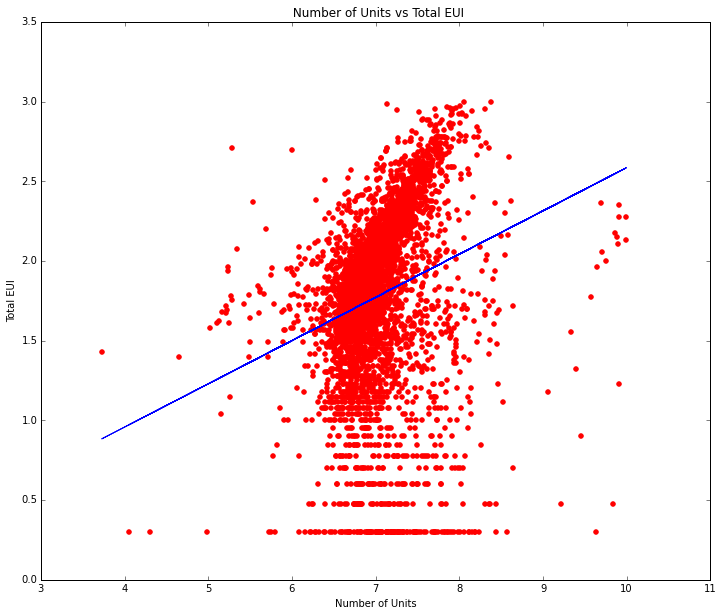

In [22]:
pl.figure(figsize=(12,10))
pl.scatter(x1, y1, color='r')
pl.plot(x1, fit.predict(), color = 'b')
pl.title(' Number of Units vs Total EUI')
pl.xlabel('Number of Units')
pl.ylabel('Total EUI')

#For understanding the success of the model, we need to undestand the kurtosis and likelihood. If the kurtosis is low ad the likelihood is high that model is better than the other. In our example, model 2 is better in term of kurtosis and the model 1 is better in terms of the likelihood. Moreoever, R value is used for the explanation capacity of the model so for two model they have same R value so they are the same about the explanation issue.

In [23]:
#Second degree curve

In [52]:
import statsmodels.formula.api as smf

x = np.log10(bblnrgdata_cut.UnitsTotal)
y = np.log10(bblnrgdata_cut.EUIt)

m = smf.ols(formula='y ~ 1 + x + I(x**2)', data=bblnrgdata_cut).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     589.2
Date:                Sun, 18 Oct 2015   Prob (F-statistic):          1.46e-228
Time:                        23:20:46   Log-Likelihood:                -2435.0
No. Observations:                4609   AIC:                             4876.
Df Residuals:                    4606   BIC:                             4895.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.6073      0.039    196.254      0.0

In [53]:
X = sm.add_constant(x)
model = sm.OLS(y, X, missing='drop')

fit = model.fit()
fit.params[1], fit.params[0] 

a = np.polyfit(x,y,2)
p = np.poly1d(a)
X = np.linspace(x.min(), x.max(), 1000)
Y = p(X)


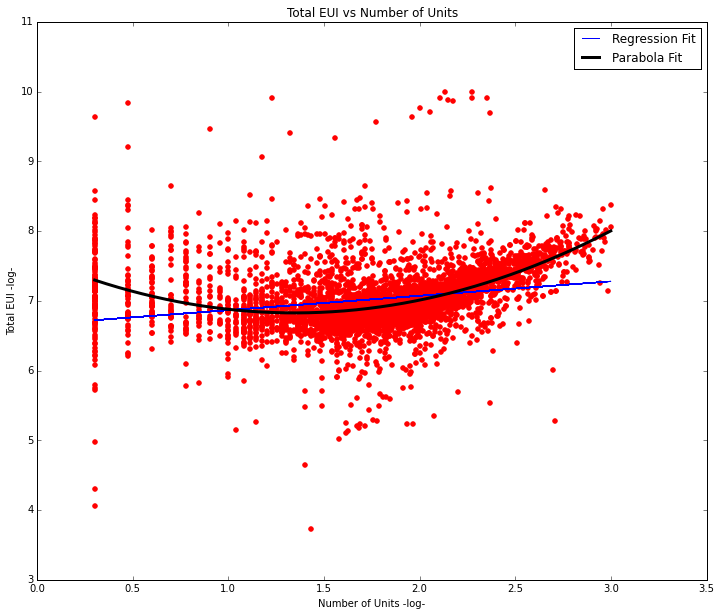

In [56]:
#plotting

pl.figure(figsize=(12,10))
pl.scatter(x, y, color='r')
pl.plot(x, fit.predict(), color='b', label='Regression Fit')
pl.plot(X, Y, color = 'k', linewidth=3, label='Parabola Fit')
pl.title('Total EUI vs Number of Units')
pl.xlabel('Number of Units -log-')
pl.ylabel('Total EUI -log-')
pl.legend( loc='best')


#Second model is better because it has high likelihood value and the low value of Kurtosis. Additionally, R squared value is better and F-statistic higher than the others.

#Extra Creadit

In [24]:
x2 = bblnrgdata['PolicePrct'].astype(float)



C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


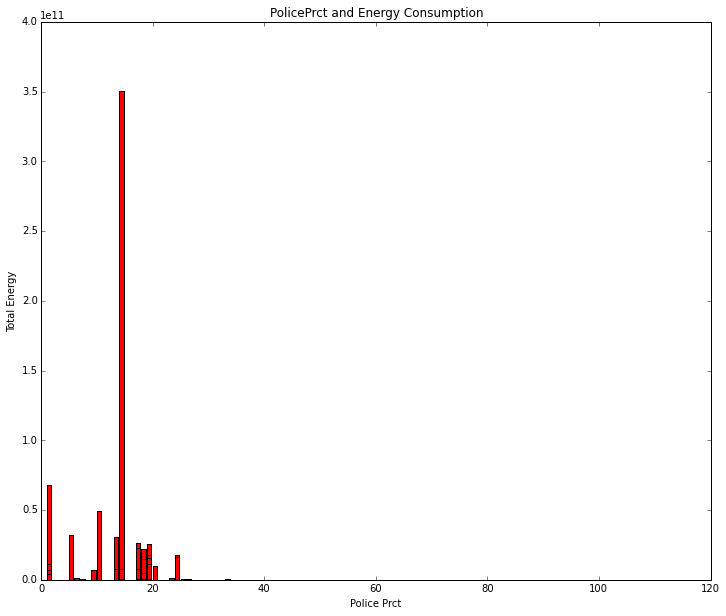

In [25]:
pl.figure(figsize=(12,10))

y = bblnrgdata['EUIt']

pl.bar(x2, y, color='r')

pl.title('PolicePrct and Energy Consumption')
pl.xlabel('Police Prct')
pl.ylabel('Total Energy ')
pl.legend( loc='best')

#I plot the Police Prct and energy usage relation.